### Capacity chart

Runs in which tRNA are co-varied:

In [1]:
import cPickle as pkl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd

from collections import defaultdict

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
runs = [
#r"/home/martin/git/TRSL/results/50000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160512_0851_1200s.p",
#r"/home/martin/git/TRSL/results/50000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160512_0827_1200s.p",
#r"/home/martin/git/TRSL/results/100000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_1749_1200s.p",
#r"/home/martin/git/TRSL/results/100000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_1838_1200s.p",
#r"/home/martin/git/TRSL/results/150000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2002_1200s.p",
#r"/home/martin/git/TRSL/results/150000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2106_1200s.p",
#r"/home/martin/git/TRSL/results/200000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2252_1200s.p",
#r"/home/martin/git/TRSL/results/200000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0018_1200s.p",
#r"/home/martin/git/TRSL/results/250000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0233_1200s.p",
#r"/home/martin/git/TRSL/results/250000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0422_1200s.p",
#r"/home/martin/git/TRSL/results/300000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0707_1200s.p",
#r"/home/martin/git/TRSL/results/300000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0922_1200s.p",
#r"/home/martin/git/TRSL/results/350000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_1235_1200s.p",
#r"/home/martin/git/TRSL/results/350000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_1507_1200s.p",
#r"/home/martin/git/TRSL/results/400000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_1853_1200s.p",
#r"/home/martin/git/TRSL/results/400000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_2149_1200s.p",
#r"/home/martin/git/TRSL/results/450000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_0201_1200s.p",
#r"/home/martin/git/TRSL/results/450000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_0523_1200s.p",
#r"/home/martin/git/TRSL/results/500000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_1421_1200s.p",
#r"/home/martin/git/TRSL/results/500000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_1021_1200s.p"
r"/home/martin/git/TRSL/results/50000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1621_1200s.p",
r"/home/martin/git/TRSL/results/50000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1647_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1747_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1833_1200s.p",
r"/home/martin/git/TRSL/results/150000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1952_1200s.p",
r"/home/martin/git/TRSL/results/150000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_2100_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_2249_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_0019_1200s.p",
r"/home/martin/git/TRSL/results/250000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_0238_1200s.p",
r"/home/martin/git/TRSL/results/250000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_0432_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_0723_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_0942_1200s.p",
r"/home/martin/git/TRSL/results/350000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_1302_1200s.p",
r"/home/martin/git/TRSL/results/350000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_1536_1200s.p",
r"/home/martin/git/TRSL/results/400000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_1923_1200s.p",
r"/home/martin/git/TRSL/results/400000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160907_2221_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160908_0241_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160908_0605_1200s.p",
r"/home/martin/git/TRSL/results/500000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160908_1054_1200s.p",
r"/home/martin/git/TRSL/results/500000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160908_1458_1200s.p"
]

In [4]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

Only run once:

In [5]:
for run in runs:
    print run
    #replace(run, "_numpypy.multiarray", "numpy.core.multiarray")

/home/martin/git/TRSL/results/50000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1621_1200s.p
/home/martin/git/TRSL/results/50000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1647_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1747_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1833_1200s.p
/home/martin/git/TRSL/results/150000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160906_1952_1200s.p
/home/martin/git/TRSL/results/150000 ribosomes, 30061 phase transcriptome, va

In [6]:
from matplotlib.font_manager import FontProperties

ribo = {}
ribo_free = {}
ribo_bound = {}

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    
    if len(results['transcriptome']) in ribo:
        ribo[len(results['transcriptome'])].append(results['n_ribosomes'])
    else:
        ribo[len(results['transcriptome'])] = [results['n_ribosomes']]
        
    if len(results['transcriptome']) in ribo_free:
        ribo_free[len(results['transcriptome'])].append(results["timecourses"]["ribos._free"][-1])
    else:
        ribo_free[len(results['transcriptome'])] = [results["timecourses"]["ribos._free"][-1]]

    if len(results['transcriptome']) in ribo_bound:
        ribo_bound[len(results['transcriptome'])].append(results["timecourses"]["ribos._bound"][-1])
    else:
        ribo_bound[len(results['transcriptome'])] = [results["timecourses"]["ribos._bound"][-1]]

transcriptome length: 57558
50000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
50000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 57558
100000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
100000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 57558
150000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
150000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 57558
200000 r

In [7]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))

In [8]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time serie

In [9]:
tag = run.split("/")[-1]
tag

'500000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160908_1458_1200s.p'

In [10]:
pkl.dump(timecourses, open("../../results/evened_timecourses_" + tag, "wb"))

In [11]:
ribo_numbers = sorted(timecourses.keys())
print ribo_numbers

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]


In [12]:
data = pd.Panel4D(timecourses)
data

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel4D is deprecated and will be removed in a future version.
The recommended way to represent these types of n-dimensional data are with
the `xarray package <http://xarray.pydata.org/en/stable/>`__.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 10 (labels) x 2 (items) x 5999 (major_axis) x 4716 (minor_axis)
Labels axis: 50000 to 500000
Items axis: 30061 to 60000
Major_axis axis: 0 to 5998
Minor_axis axis: YAL001C to YPR199C

The following is to get the index to seconds (time slice was 0.2 seconds).

In [13]:
data.rename_axis(mapper=lambda x: 0.2*x, axis=2, inplace=True)

In [14]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 10 (items) x 2 (major_axis) x 5999 (minor_axis)
Items axis: 50000 to 500000
Major_axis axis: 30061 to 60000
Minor_axis axis: 0.0 to 1199.6000000000001

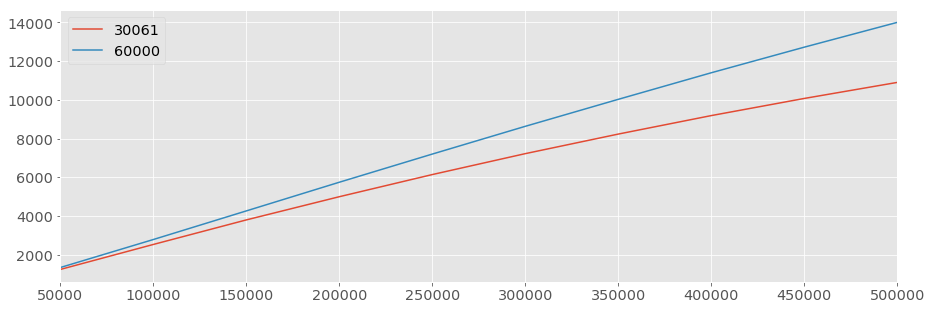

In [15]:
trans_eff_cell = (total_protein.minor_xs(1199.4) - total_protein.minor_xs(899.2))/(1199.4 - 899.2)
trans_eff_cell.T.plot()

In [16]:
trans_eff_per_ribo = trans_eff_cell/ribo_numbers

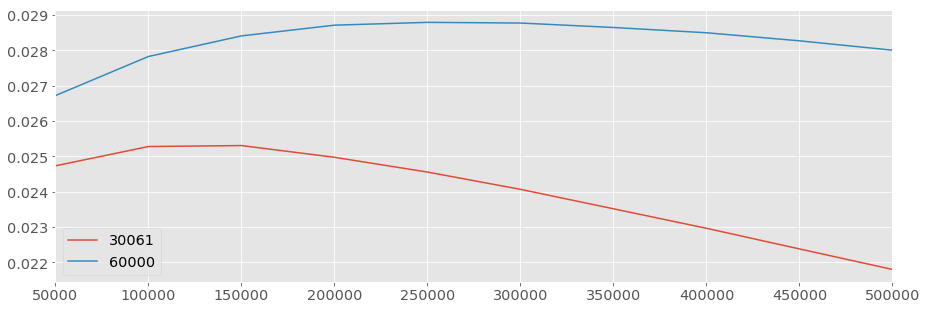

In [17]:
trans_eff_per_ribo.T.plot()

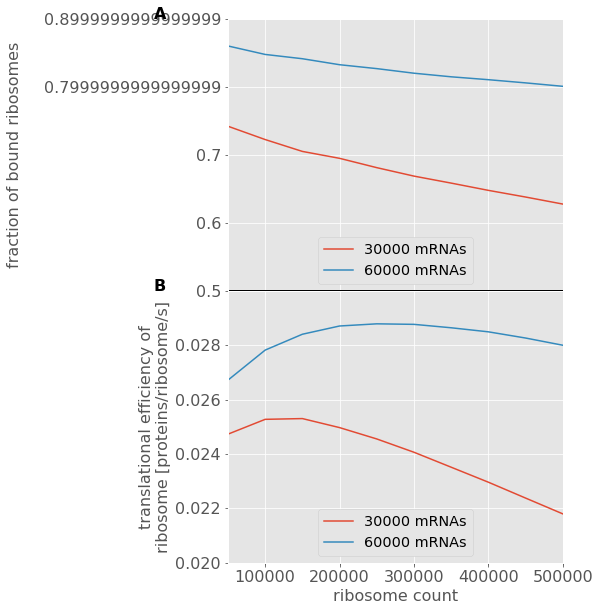

In [18]:
plt.rcParams['figure.figsize'] = (6, 10)

#######################################################################################################################
# Two subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

#######################################################################################################################
x1 = np.array(ribo[ribo.keys()[0]])
y1 = np.array(ribo_bound[ribo.keys()[0]]) * 1.0 / np.array(ribo[ribo.keys()[0]])
ax1.plot(x1, y1)

x1 = np.array(ribo[ribo.keys()[1]])
y1 = np.array(ribo_bound[ribo.keys()[1]]) * 1.0 / np.array(ribo[ribo.keys()[1]])
ax1.plot(x1, y1)

ax = ax1
ax.set_ylabel("fraction of bound ribosomes\n", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

xpos = np.arange(100000, 500001, 100000)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos, fontsize=16)

ypos = np.arange(0.5, 0.91, 0.1)
ax.set_yticks(ypos)
ax.set_yticklabels(ypos, fontsize=16)

ax.axhline(0.5, color='black', lw=2)

ax.set_ylim([0.5, 0.9])

ax.text(-50000, 0.9, "A", fontsize=16, weight="bold")

ax.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0)
#ax1.set_title('Sharing both axes')

#######################################################################################################################
#ax2.plot(x2, y2, color='black')

ax = ax2
trans_eff_per_ribo.T.plot(ax=ax)
ypos = np.arange(0.02, 0.03, 0.002)
ax.set_yticks(ypos)
ax.set_yticklabels(["%.3f" % round(p,3) for p in ypos], fontsize=16)
ax.set_ylabel("translational efficiency of\nribosome [proteins/ribosome/s]", fontsize=16)

ax.set_xlabel("ribosome count", fontsize=16)

ax.set_ylim([0.02, 0.03])

ax.text(-50000, 0.03, "B", fontsize=16, weight="bold")

plt.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0)

#######################################################################################################################
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

/home/martin/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


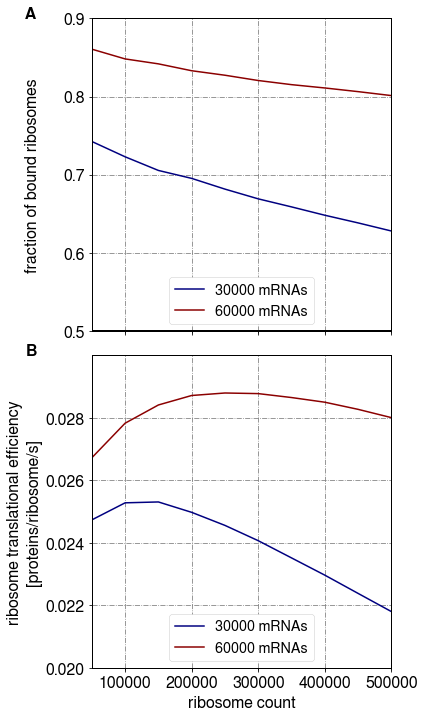

In [19]:
plt.rc('font',family='FreeSans')
plt.rcParams['figure.figsize'] = (6, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.linestyle']='-.'
plt.rcParams['grid.color']='grey'
#plt.rcParams['figure.facecolor'] = 'white'

hfont = {'fontname':'FreeSans'}

#######################################################################################################################
# Two subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False, subplot_kw=dict(axisbg='white'))

#######################################################################################################################
x1 = np.array(ribo[ribo.keys()[0]])
y1 = np.array(ribo_bound[ribo.keys()[0]]) * 1.0 / np.array(ribo[ribo.keys()[0]])
ax1.plot(x1, y1, color='navy')

x1 = np.array(ribo[ribo.keys()[1]])
y1 = np.array(ribo_bound[ribo.keys()[1]]) * 1.0 / np.array(ribo[ribo.keys()[1]])
ax1.plot(x1, y1, color='darkred')

ax = ax1
ax.set_ylabel("fraction of bound ribosomes\n", fontsize=16, **hfont)
plt.tick_params(axis='both', which='major', labelsize=16)

xpos = np.arange(100000, 500001, 100000)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos, fontsize=16, **hfont)

ypos = np.arange(0.5, 0.91, 0.1)
ax.set_yticks(ypos)
ax.set_yticklabels(ypos, fontsize=16, **hfont)

ax.axhline(0.5, color='black', lw=2)

ax.set_ylim([0.5, 0.9])

ax.text(-50000, 0.9, "A", fontsize=16, weight="bold", **hfont)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

ax.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
#ax1.set_title('Sharing both axes')

#######################################################################################################################
#ax2.plot(x2, y2, color='black')

ax = ax2
trans_eff_per_ribo.T.plot(ax=ax, color=['navy', 'darkred'])
ypos = np.arange(0.02, 0.03, 0.002)
ax.set_yticks(ypos)
ax.set_yticklabels(["%.3f" % round(p, 3) for p in ypos], fontsize=16)
ax.set_ylabel("ribosome translational efficiency\n[proteins/ribosome/s]", fontsize=16, **hfont)

ax.set_xlabel("ribosome count", fontsize=16, **hfont)

ax.set_ylim([0.02, 0.03])

ax.text(-50000, 0.03, "B", fontsize=16, weight="bold", **hfont)

plt.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')

#######################################################################################################################
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
f.tight_layout()

plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.savefig("ribosome_efficiency.png")